# <font color=Purple> Loan Prediction - Classification Model

## The goal of Loan Prediction project is to develop machine learning models that predict whether loan applications will be approved or not. This project aims to enhance data analysis and modeling skills while helping financial institutions automate risk assessment and improve their decision-making processes.

<img src='https://www.helcim.com/images/an-overview-of-high-risk-credit-card-processing.webp'>

# <font color=Red> Data Dictionary

## <font color=Red> Before Starting to Project


In [3]:
1-Projei ve amaci anla
2-Veriyi anla
3-Hedefin icin kullanabilecegin stunlari belirle
4-Veri manipulasyonlar(bos veri doldurma,veri temizleme)
5-object olup numerice cevirebilecek stunlari cevirme
6-feature enginnering
7-veriye get dummies uygula
8-x ve y olarak ikiye ayir(regression ve classification clustering de sadece x)
9-train ve test bize kendiliginden verilmediyse train test split yap
10-fit predict
11-tahminimiin dogruluk oranini olc

SyntaxError: invalid syntax (1225580433.py, line 1)

# <font color=Green> Import Necessary Packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# <font color=Purple> Reading and Understanding Data 'EDA'-Exploratory Data Analysis

In [8]:
df=pd.read_csv('LoansTrainingSet.csv', low_memory=False)

In [9]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [11]:
df['Customer ID'].nunique()

215700

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,256984.00,13713306.26,34381306.57,505.00,8299.00,14298.00,24367.00,99999999.00
Credit Score,195308.00,1251.12,1762.02,585.00,714.00,733.00,744.00,7510.00
Annual Income,195308.00,71952.72,58877.57,0.00,44321.00,61242.00,86462.00,8713547.00
Years of Credit History,256984.00,18.29,7.08,3.40,13.50,17.00,21.70,70.50
Months since last delinquent,116601.00,34.88,21.85,0.00,16.00,32.00,51.00,176.00
Number of Open Accounts,256984.00,11.11,4.98,0.00,8.00,10.00,14.00,76.00
Number of Credit Problems,256984.00,0.16,0.46,0.00,0.00,0.00,0.00,11.00
Current Credit Balance,256984.00,15406.56,19665.06,0.00,5974.00,11078.00,19319.00,1731412.00
Bankruptcies,256455.00,0.11,0.34,0.00,0.00,0.00,0.00,7.00
Tax Liens,256961.00,0.03,0.25,0.00,0.00,0.00,0.00,11.00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [15]:
df.sample()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
220506,db6a1a93-9924-4a0c-926d-c0eb26de6e86,173b6fbd-71fe-4efc-9fff-2208284bc2cf,Fully Paid,19862,Short Term,NaN,10+ years,Home Mortgage,NaN,Home Improvements,"$1,569.10",32.70,40.00,9,0,36505,49533,0.00,0.00


In [16]:
df.shape

(256984, 19)

In [17]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [18]:
missing_percentage = df.isnull().mean() * 100

In [19]:
missing_percentage

Loan ID                         0.00
Customer ID                     0.00
Loan Status                     0.00
Current Loan Amount             0.00
Term                            0.00
Credit Score                   24.00
Years in current job            4.47
Home Ownership                  0.00
Annual Income                  24.00
Purpose                         0.00
Monthly Debt                    0.00
Years of Credit History         0.00
Months since last delinquent   54.63
Number of Open Accounts         0.00
Number of Credit Problems       0.00
Current Credit Balance          0.00
Maximum Open Credit             0.00
Bankruptcies                    0.21
Tax Liens                       0.01
dtype: float64

In [20]:
df['Credit Score'].value_counts()

Credit Score
747.00     5669
740.00     5537
741.00     5499
746.00     5486
742.00     5219
           ... 
6070.00       3
5980.00       3
5910.00       3
5930.00       2
5860.00       1
Name: count, Length: 334, dtype: int64

In [18]:
df['Credit Score'].median()

733.0

In [21]:
df["Credit Score"]=df["Credit Score"].fillna(df["Credit Score"].median())

In [22]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [23]:
df['Annual Income'].value_counts()

Annual Income
60684.00     31
49630.00     30
61188.00     30
59646.00     30
61134.00     28
             ..
65276.00      1
254462.00     1
126888.00     1
98337.00      1
30854.00      1
Name: count, Length: 60558, dtype: int64

In [24]:
df["Annual Income"] = df["Annual Income"].fillna(df["Annual Income"].median())

In [25]:
df["Years in current job"] = df["Years in current job"].str.replace('years', '').str.replace(' year', '').str.replace("+", "").str.replace("<", "").astype(float)

In [26]:
df.sample()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
7887,07e7c5d4-099e-4d79-9bcc-9f5f3b38a66e,de2cee48-12e3-4656-abd1-9e52ac5641a7,Fully Paid,24161,Short Term,750.00,10.00,Home Mortgage,112750.00,Debt Consolidation,$986.57,39.90,18.00,13,0,95655,169601,0.00,0.00


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,256984.00,13713306.26,34381306.57,505.00,8299.00,14298.00,24367.00,99999999.00
Credit Score,256984.00,1126.77,1551.95,585.00,722.00,733.00,741.00,7510.00
Years in current job,245508.00,5.95,3.50,1.00,3.00,6.00,10.00,10.00
Annual Income,256984.00,69382.15,51531.70,0.00,49657.00,61242.00,76893.25,8713547.00
Years of Credit History,256984.00,18.29,7.08,3.40,13.50,17.00,21.70,70.50
Months since last delinquent,116601.00,34.88,21.85,0.00,16.00,32.00,51.00,176.00
Number of Open Accounts,256984.00,11.11,4.98,0.00,8.00,10.00,14.00,76.00
Number of Credit Problems,256984.00,0.16,0.46,0.00,0.00,0.00,0.00,11.00
Current Credit Balance,256984.00,15406.56,19665.06,0.00,5974.00,11078.00,19319.00,1731412.00
Bankruptcies,256455.00,0.11,0.34,0.00,0.00,0.00,0.00,7.00


In [28]:
df['Years in current job'].value_counts()

Years in current job
10.00    78896
1.00     37758
2.00     23462
3.00     20659
5.00     17864
4.00     16166
6.00     14597
7.00     13968
8.00     12206
9.00      9932
Name: count, dtype: int64

In [29]:
df["Years in current job"] = df["Years in current job"].fillna(df["Years in current job"].mode()[0])

In [30]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job                 0
Home Ownership                       0
Annual Income                        0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [31]:
df.dropna(subset=["Bankruptcies","Tax Liens"], inplace=True)

In [32]:
df.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                         0
Years in current job                 0
Home Ownership                       0
Annual Income                        0
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140379
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                         0
Tax Liens                            0
dtype: int64

In [33]:
del df['Months since last delinquent']

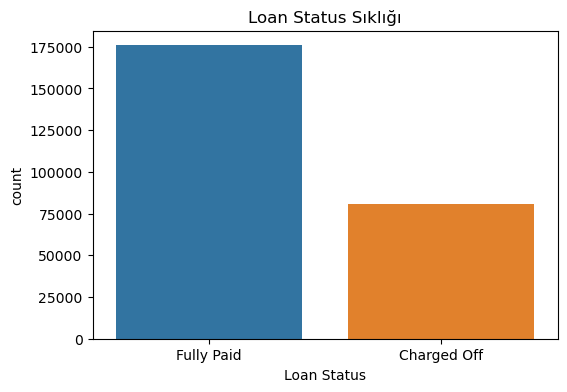

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Loan Status', hue='Loan Status')

plt.title("Loan Status Sıklığı")
plt.show()

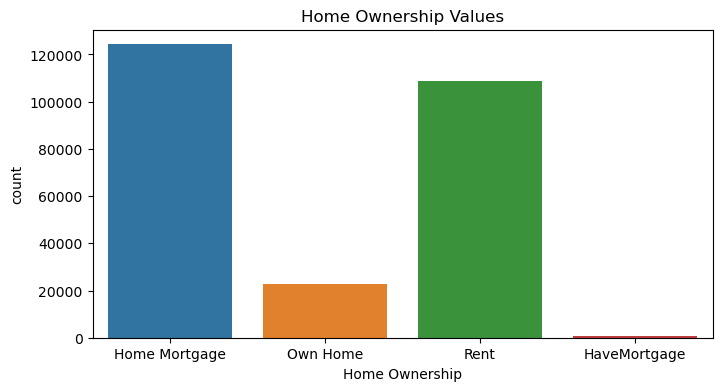

In [35]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Home Ownership', hue='Home Ownership')
plt.title('Home Ownership Values')
plt.show()

In [36]:
df["Term"] = df["Term"].astype("category")
df["Loan Status"] = df["Loan Status"].astype("category")
df["Home Ownership"] = df["Home Ownership"].astype("category")
df["Purpose"] = df["Purpose"].astype("category")

In [37]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.00,10.00,Home Mortgage,33694.00,Debt Consolidation,$584.03,12.30,10,0,6760,16056,0.00,0.00
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.00,4.00,Home Mortgage,42269.00,other,"$1,106.04",26.30,17,0,6262,19149,0.00,0.00
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.00,10.00,Home Mortgage,90126.00,Debt Consolidation,"$1,321.85",28.80,5,0,20967,28335,0.00,0.00
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.00,10.00,Own Home,38072.00,Debt Consolidation,$751.92,26.20,9,0,22529,43915,0.00,0.00
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.00,4.00,Rent,50025.00,Debt Consolidation,$355.18,11.50,12,0,17391,37081,0.00,0.00


In [38]:
df["Monthly Debt"] = df["Monthly Debt"].str.replace('$','').str.replace(',','').astype(float)

In [39]:
# Geçersiz değerleri (örneğin '#VALUE!') NaN olarak değiştirin
df['Maximum Open Credit'] = df['Maximum Open Credit'].replace('#VALUE!', np.nan)

# Ardından, gerekli temizleme işlemlerini yapın
df['Maximum Open Credit'] = df['Maximum Open Credit'].str.replace('$', '').str.replace(',', '')

# NaN değerleri kontrol edin ve dönüşüm yapın
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(float)


In [40]:
# Öncelikle 'Maximum Open Credit' sütunundaki NaN değerlerini sütunun medyanı ile doldurun
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())


In [41]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256455 entries, 0 to 256983
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Loan ID                    256455 non-null  object  
 1   Customer ID                256455 non-null  object  
 2   Loan Status                256455 non-null  category
 3   Current Loan Amount        256455 non-null  int64   
 4   Term                       256455 non-null  category
 5   Credit Score               256455 non-null  float64 
 6   Years in current job       256455 non-null  float64 
 7   Home Ownership             256455 non-null  category
 8   Annual Income              256455 non-null  float64 
 9   Purpose                    256455 non-null  category
 10  Monthly Debt               256455 non-null  float64 
 11  Years of Credit History    256455 non-null  float64 
 12  Number of Open Accounts    256455 non-null  int64   
 13  Number of Credit Pr

In [43]:
df.sample()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
208079,cf16ce20-7229-423b-98a0-5970ddf15825,9fcdd45a-688e-4185-8711-526a99d38bf0,Fully Paid,99999999,Short Term,697.00,8.00,Rent,36558.00,Buy a Car,79.82,3.40,3,0,1947,4064.00,0.00,0.00


In [44]:
#del df['Monthlt Debt']

In [45]:
df['Current Credit Balance'].astype(float)

0         6760.00
1         6262.00
2        20967.00
3        22529.00
4        17391.00
           ...   
256979   43992.00
256980    1717.00
256981    3315.00
256982    3315.00
256983   28317.00
Name: Current Credit Balance, Length: 256455, dtype: float64

In [46]:
df['Maximum Open Credit'].astype(float)

0        16056.00
1        19149.00
2        28335.00
3        43915.00
4        37081.00
           ...   
256979   44080.00
256980    9758.00
256981   20090.00
256982   20090.00
256983   62371.00
Name: Maximum Open Credit, Length: 256455, dtype: float64

# <font color=Red> Feature Engineering

# <font color=Purple> "Current Credit Balance", bir kişinin mevcut kredi borcunu ifade ederken, "Maximum Open Credit" ise o kişinin sahip olduğu toplam kredi limitini gösterir. Bu iki değer arasındaki oran, kişinin kredi kullanımını belirler.

In [49]:
df['Credit Utilization'] = df['Current Credit Balance'] / df['Maximum Open Credit']

In [50]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
Credit Utilization           1543
dtype: int64

In [51]:
df['Credit Utilization'].shape

(256455,)

In [52]:
df.describe()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Utilization
count,256455.00,256455.00,256455.00,256455.00,256455.00,256455.00,256455.00,256455.00,256455.00,256455.00,256455.00,256455.00,254912.00
mean,13713889.80,1126.99,6.14,69386.64,964.09,18.28,11.11,0.16,15407.60,35681.46,0.11,0.03,inf
std,34381912.97,1552.34,3.52,51527.14,634.14,7.08,4.98,0.46,19664.47,555479.28,0.34,0.25,NaN
min,701.00,585.00,1.00,0.00,0.00,3.40,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8308.00,722.00,3.00,49667.00,532.84,13.50,8.00,0.00,5980.00,12779.00,0.00,0.00,0.38
50%,14304.00,733.00,6.00,61242.00,845.19,17.00,10.00,0.00,11080.00,21738.00,0.00,0.00,0.57
75%,24373.00,741.00,10.00,76908.00,1253.07,21.70,14.00,0.00,19319.00,36165.00,0.00,0.00,0.74
max,99999999.00,7510.00,10.00,8713547.00,22939.12,70.50,76.00,11.00,1731412.00,176332155.00,7.00,11.00,inf


In [53]:
df['Credit Utilization']=df['Credit Utilization'].fillna(df['Credit Utilization'].min())

In [54]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Credit Utilization           0
dtype: int64

In [55]:
df.drop(columns=["Current Credit Balance","Maximum Open Credit"], inplace=True)

In [56]:
df["Loan Status"]=df["Loan Status"].map({"Fully Paid": 1, "Charged Off": 0})

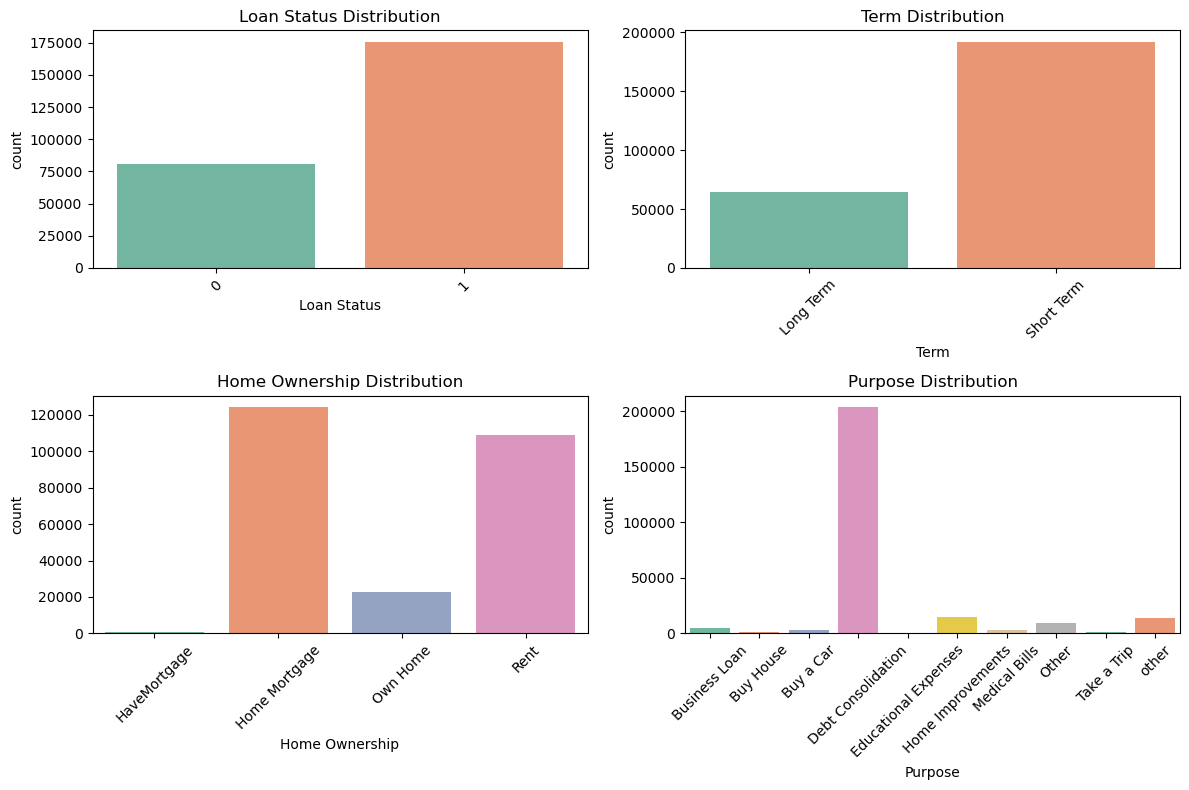

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ["Loan Status", "Term", "Home Ownership", "Purpose"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')  # Renk paletini ayarladık
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


In [58]:
# Sonsuz değerleri NaN ile değiştir
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [59]:
df.isnull().sum()

Loan ID                        0
Customer ID                    0
Loan Status                    0
Current Loan Amount            0
Term                           0
Credit Score                   0
Years in current job           0
Home Ownership                 0
Annual Income                  0
Purpose                        0
Monthly Debt                   0
Years of Credit History        0
Number of Open Accounts        0
Number of Credit Problems      0
Bankruptcies                   0
Tax Liens                      0
Credit Utilization           261
dtype: int64

In [60]:
df.dropna(inplace=True)

In [61]:
df.isnull().sum()

Loan ID                      0
Customer ID                  0
Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Years in current job         0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Bankruptcies                 0
Tax Liens                    0
Credit Utilization           0
dtype: int64

In [62]:
df["Monthly Debt"] = pd.to_numeric(df["Monthly Debt"], errors="coerce")

In [63]:
x = df.drop(['Loan ID', 'Customer ID', 'Loan Status'], axis=1)
y=df[["Loan Status"]]

In [64]:
x.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens,Credit Utilization
0,11520,Short Term,741.00,10.00,Home Mortgage,33694.00,Debt Consolidation,584.03,12.30,10,0,0.00,0.00,0.42
1,3441,Short Term,734.00,4.00,Home Mortgage,42269.00,other,1106.04,26.30,17,0,0.00,0.00,0.33
2,21029,Short Term,747.00,10.00,Home Mortgage,90126.00,Debt Consolidation,1321.85,28.80,5,0,0.00,0.00,0.74
3,18743,Short Term,747.00,10.00,Own Home,38072.00,Debt Consolidation,751.92,26.20,9,0,0.00,0.00,0.51
4,11731,Short Term,746.00,4.00,Rent,50025.00,Debt Consolidation,355.18,11.50,12,0,0.00,0.00,0.47


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256194 entries, 0 to 256983
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Loan ID                    256194 non-null  object  
 1   Customer ID                256194 non-null  object  
 2   Loan Status                256194 non-null  category
 3   Current Loan Amount        256194 non-null  int64   
 4   Term                       256194 non-null  category
 5   Credit Score               256194 non-null  float64 
 6   Years in current job       256194 non-null  float64 
 7   Home Ownership             256194 non-null  category
 8   Annual Income              256194 non-null  float64 
 9   Purpose                    256194 non-null  category
 10  Monthly Debt               256194 non-null  float64 
 11  Years of Credit History    256194 non-null  float64 
 12  Number of Open Accounts    256194 non-null  int64   
 13  Number of Credit Pr

In [66]:
x=pd.get_dummies(x, drop_first=True)

In [67]:
pd.set_option("display.max_columns",6000)
pd.set_option("display.max_rows",300)

In [68]:
x.head()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens,Credit Utilization,Term_Short Term,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
0,11520,741.00,10.00,33694.00,584.03,12.30,10,0,0.00,0.00,0.42,True,True,False,False,False,False,True,False,False,False,False,False,False
1,3441,734.00,4.00,42269.00,1106.04,26.30,17,0,0.00,0.00,0.33,True,True,False,False,False,False,False,False,False,False,False,False,True
2,21029,747.00,10.00,90126.00,1321.85,28.80,5,0,0.00,0.00,0.74,True,True,False,False,False,False,True,False,False,False,False,False,False
3,18743,747.00,10.00,38072.00,751.92,26.20,9,0,0.00,0.00,0.51,True,False,True,False,False,False,True,False,False,False,False,False,False
4,11731,746.00,4.00,50025.00,355.18,11.50,12,0,0.00,0.00,0.47,True,False,False,True,False,False,True,False,False,False,False,False,False


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [70]:
r=RandomForestClassifier()

In [71]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
rtahmin=r.predict(x_test)

In [73]:
accuracy_score(rtahmin,y_test)

0.845410722301372

In [74]:
print(classification_report(rtahmin,y_test))

              precision    recall  f1-score   support

           0       0.62      0.85      0.71     11733
           1       0.95      0.85      0.89     39506

    accuracy                           0.85     51239
   macro avg       0.78      0.85      0.80     51239
weighted avg       0.87      0.85      0.85     51239



In [75]:
confusion_matrix(rtahmin,y_test)

array([[ 9923,  1810],
       [ 6111, 33395]], dtype=int64)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()
ab= AdaBoostClassifier()
mn= MultinomialNB()

def algo_test(x, y):
    modeller=[ b, l, d, r, gb, kn, ab, mn]
    isimler=["BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier",
             "AdaBoostClassifier", "MultinomialNB"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    print("Veriler hazır modeller deneniyor")
    for model in modeller:
        print(model, " modeli eğitiliyor!..")
        model=model.fit(x_train,y_train)
        tahmin=model.predict(x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(y_test, tahmin))
        precision.append(precision_score(y_test, tahmin, average="micro"))
        recall.append(recall_score(y_test, tahmin, average="micro"))
        f1.append(f1_score(y_test, tahmin, average="micro"))
        print(confusion_matrix(y_test, tahmin))

    print("Eğitim tamamlandı.")
    
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    model=metrics.iloc[0,-1]
    tahmin=model.predict(np.array(x_test) if model==kn else x_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, tahmin))
    print("classification Report:")
    print(classification_report(y_test, tahmin))
    print("Diğer Modeller:")
    
    return metrics.drop("Model", axis=1)



In [151]:
algo_test(x,y)

Veriler hazır modeller deneniyor
BernoulliNB()  modeli eğitiliyor!..
[[ 3526 20595]
 [ 2961 49777]]
LogisticRegression()  modeli eğitiliyor!..
[[ 4885 19236]
 [  257 52481]]
DecisionTreeClassifier()  modeli eğitiliyor!..
[[15921  8200]
 [11044 41694]]
RandomForestClassifier()  modeli eğitiliyor!..
[[14158  9963]
 [ 2772 49966]]
GradientBoostingClassifier()  modeli eğitiliyor!..
[[ 8285 15836]
 [ 2427 50311]]
KNeighborsClassifier()  modeli eğitiliyor!..
[[10472 13649]
 [ 8088 44650]]
AdaBoostClassifier()  modeli eğitiliyor!..
[[ 8795 15326]
 [ 3646 49092]]
MultinomialNB()  modeli eğitiliyor!..
[[24121     0]
 [42228 10510]]
Eğitim tamamlandı.
En başarılı model:  RandomForestClassifier
Confusion Matrix:
[[14158  9963]
 [ 2772 49966]]
classification Report:
              precision    recall  f1-score   support

           0       0.84      0.59      0.69     24121
           1       0.83      0.95      0.89     52738

    accuracy                           0.83     76859
   macro avg     

,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.83,0.83,0.83,0.83
GradientBoostingClassifier,0.76,0.76,0.76,0.76
AdaBoostClassifier,0.75,0.75,0.75,0.75
DecisionTreeClassifier,0.75,0.75,0.75,0.75
LogisticRegression,0.75,0.75,0.75,0.75
KNeighborsClassifier,0.72,0.72,0.72,0.72
BernoulliNB,0.69,0.69,0.69,0.69
MultinomialNB,0.45,0.45,0.45,0.45


# <font color=Red>Proje Sonuçları ve Değerlendirme

### Bu projede, kredi durumu tahmini yapmak amacıyla çeşitli sınıflandırma algoritmaları kullanıldı. Modelin eğitiminde elde edilen sonuçlar, doğruluk,  hassasiyet ve F1 skoru gibi metrikler ile değerlendirildi. Ayrıca, modelin genel performansını anlamak için karmaşıklık matrisleri kullanıldı.

### Sonuçlar, modelin kredi başvurularını başarılı bir şekilde sınıflandırabildiğini göstermektedir. Özellikle, belirli özelliklerin kredi durumu  üzerindeki etkisi analiz edildi ve bu bilgiler, finansal kuruluşların kredi kararlarını daha bilinçli bir şekilde almasına katkıda bulunabilir.

### Gelecek çalışmalar için modelin genel başarısını artırmak adına daha fazla veri ve farklı özellik mühendislik teknikleri üzerinde durulması önerilmektedir. Ayrıca, hiperparametre optimizasyonu ile modelin performansı daha da iyileştirilebilir.

